Reproduce the following figure using the dataset found [here](https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv).

In [4]:
library(tidyverse)
df=read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [12]:
df %>% 
    arrange(desc(Men)) %>% 
    mutate(Major_category = fct_inorder(Major_category)) %>%
    .$Major_category %>% levels
#    mutate(Major_category %>% fct_reorder())

df2=df %>% pivot_longer(names_to='Sex', values_to='count', one_of('Men', 'Women')) %>%
    select(Major, Total, Major_category, Sex, count) %>%
    group_by(Major_category, Sex) %>%
    summarize(N=sum(count, na.rm=T)) %>%
    print

[1] "Business"                            "Biology & Life Science"             
 [3] "Computers & Mathematics"             "Social Science"                     
 [5] "Psychology & Social Work"            "Engineering"                        
 [7] "Law & Public Policy"                 "Humanities & Liberal Arts"          
 [9] "Communications & Journalism"         "Industrial Arts & Consumer Services"
[11] "Physical Sciences"                   "Arts"                               
[13] "Education"                           "Health"                             
[15] "Agriculture & Natural Resources"     "Interdisciplinary"

# A tibble: 32 x 3
# Groups:   Major_category [16]
   Major_category                  Sex        N
   <fct>                           <chr>  <int>
 1 Agriculture & Natural Resources Men    40357
 2 Agriculture & Natural Resources Women  35263
 3 Arts                            Men   134390
 4 Arts                            Women 222740
 5 Biology & Life Science          Men   184919
 6 Biology & Life Science          Women 268943
 7 Business                        Men   667852
 8 Business                        Women 634524
 9 Communications & Journalism     Men   131921
10 Communications & Journalism     Women 260680
# … with 22 more rows


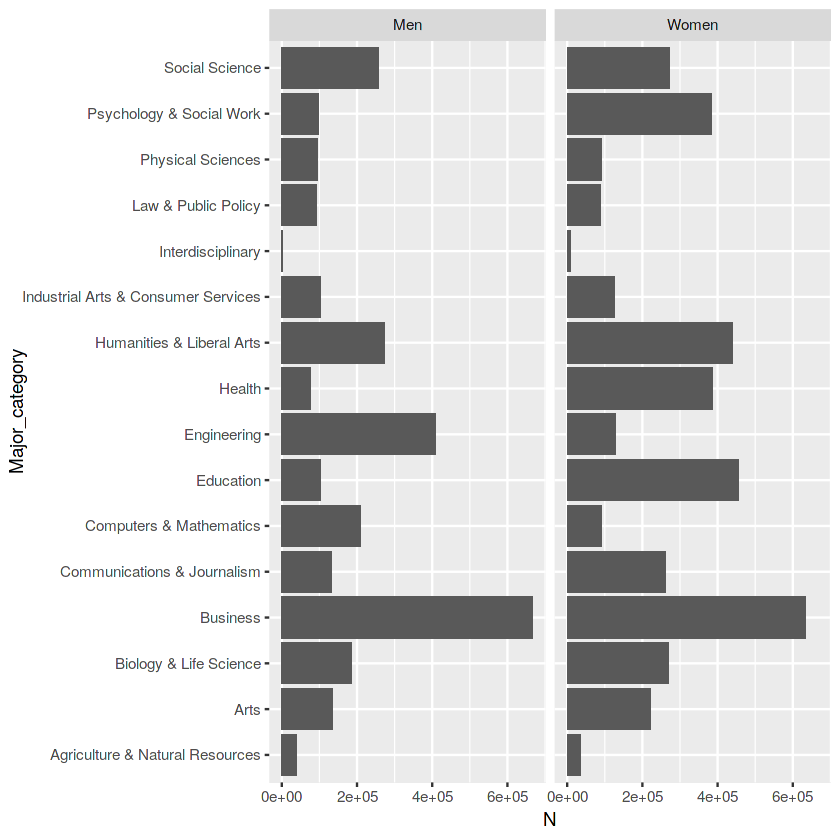

In [13]:
p=ggplot(df2, aes(x=Major_category, y=N))
p=p+geom_bar(stat='identity') +coord_flip()
p=p+facet_wrap(~Sex)
p

<img src="figs/example.png" style="width: 750px" />

How would you add hover interactivity to this figure?